##### ПИ18-1 Гриднев Д.В.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from  sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size = 0.2, random_state=47)

In [4]:
len(X_train)

455

In [7]:
clf = SVC(C=0.01)
 
clf.fit(X_train, y_train)
 
print(f"Score train {clf.score(X_train, y_train)}")
print(f"Score test {clf.score(X_test, y_test)}")

Score train 0.6945054945054945
Score test 0.6666666666666666


Чем больше данных для обучения и теста модели, тем лучше модель.
Нужно больше данных для лучшего обучения модели, при добавлении признаков и количеств наблюдений есть шанс улучшить модель

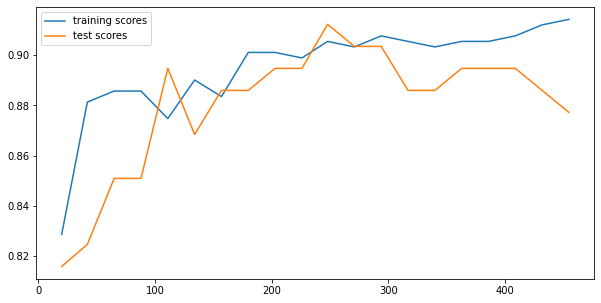

In [8]:
training_scores = []
test_scores = []
numbers = []
 
for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=10, kernel='rbf')
    clf.fit(X_train[:int(i)], y_train[:int(i)])
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Корреляция

In [92]:
df = pd.DataFrame(X[:, :2])
df['y'] = y
df.corr()

,0,1,y
0,1.000000,0.317126,-0.730193
1,0.317126,1.000000,-0.405756
y,-0.730193,-0.405756,1.000000


Случай лес испльзует много решающих деревьев 

In [9]:
rfclf = RandomForestClassifier()
params = {
    'n_estimators': [100,150,200,300,500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,6,7,10],
    'min_samples_split': [2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample'],
}

Запустим подбор лучших параметров

In [10]:
gscv = GridSearchCV(rfclf, params, n_jobs = -1, verbose = 1, cv=3)

In [11]:
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  8.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 300, 500, 1000]},
             verbose=1)

Подобранные параметры

In [13]:
gscv.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 500}

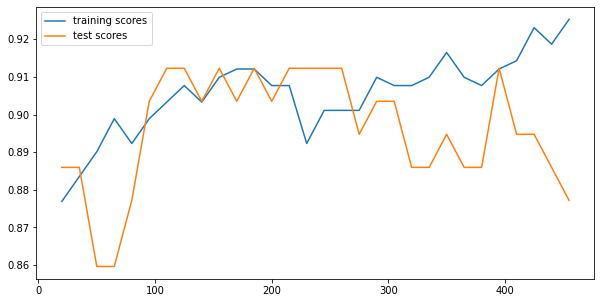

In [14]:
training_scores = []
test_scores = []
numbers = []
clf = RandomForestClassifier(
        class_weight  = 'balanced',
         criterion  = 'entropy',
         max_depth  = 3,
         max_features  = 'sqrt',
         min_samples_split = 10,
         n_estimators  = 300)
for i in np.linspace(20, len(X_train), 30):
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

In [17]:
clf = RandomForestClassifier(max_depth=3)
clf.fit(X_train, y_train)
print(f"Score train {clf.score(X_train, y_train)}")
print(f"Score test {clf.score(X_test, y_test)}")

Score train 0.9186813186813186
Score test 0.8771929824561403


Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.0001 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.0101 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.0201 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.3301 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.3401 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.3501 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.7201 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.7301 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.7401 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=61 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=66 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=71 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWa

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
[0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701, 0.0801, 0.0901, 0.1001, 0.1101, 0.1201, 0.1301, 0.1401, 0.1501, 0.1601, 0.1701, 0.1801, 0.1901, 0.2001, 0.2101, 0.2201, 0.2301, 0.2401, 0.2501, 0.2601, 0.2701, 0.2801, 0.2901, 0.3001, 0.3101, 0.3201, 0.3301, 0.3401, 0.3501, 0.3601, 0.3701, 0.3801, 0.3901, 0.4001, 0.4101, 0.4201, 0.4301, 0.4401, 0.4501, 0.4601, 0.4701, 0.4801, 0.4901, 0.5001, 0.5101, 0.5201, 0.5301, 0.5401, 0.5501, 0.5

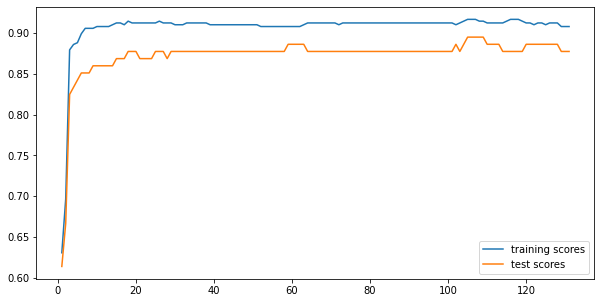

In [20]:
training_scores, test_scores = [], []
C = [i/10000 for i in range(1, 10000, 100)]
for i in [i for i in range(1,100, 5)]:
    C.append(i)
for i in [i for i in range(100,1000000, 100000)]:
    C.append(i)
C.append(1000000)
numbers = []
counter = 0

for item in C:
    counter += 1
    clf = SVC(item, kernel='rbf')
    clf.fit(X_train, y_train)
    numbers.append(counter)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(C)
print(training_scores)
print(test_scores)

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
Вкратце- это параметр регуляризации. Судя по графику, оптимальное значение С=1. В данном случае чем выше степень регуляризации, тем лучше предсказание на тестовом множестве. Оптимально- на единице.

In [21]:
clf = SVC(C=1, kernel='rbf')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9120879120879121
0.8771929824561403


In [22]:
clf = SVC(C=1000000, kernel='rbf')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9076923076923077
0.8771929824561403


In [23]:
clf = SVC()
params = {'C': C, 'kernel': ['rbf', 'linear']}
gscv = GridSearchCV(clf, params, n_jobs = -1, verbose = 1, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

Fitting 3 folds for each of 262 candidates, totalling 786 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 786 out of 786 | elapsed:  1.5min finished


{'C': 0.2601, 'kernel': 'rbf'}

In [24]:
clf = SVC(C= 0.2601, kernel= 'rbf').fit(X_train, y_train)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9120879120879121
0.8771929824561403


rbf win

1
3
5
7
[1, 3, 5, 7]
[1, 3, 5, 7]
[0.8901098901098901, 0.9032967032967033, 0.9120879120879121, 0.8791208791208791]
[0.8859649122807017, 0.8947368421052632, 0.8771929824561403, 0.8596491228070176]


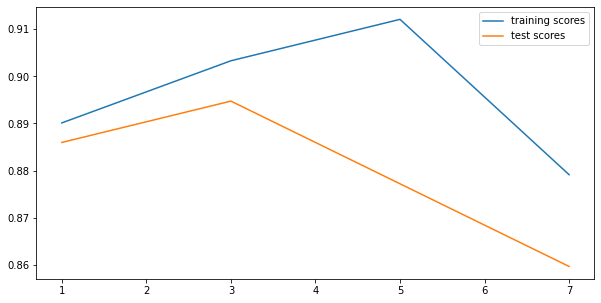

In [26]:
training_scores, test_scores, numbers, degrees = [], [], [], [i for i in range(1,8, 2)]

for degree in degrees:
    clf = SVC(degree = degree, kernel='poly')
    clf.fit(X_train, y_train)
    numbers.append(degree)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    print(degree)

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(degrees)
print(training_scores)
print(test_scores)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.0001 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.0101 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.0201 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.4001 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.4101 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.4201 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.9101 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.9201 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=0.9301 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=200100 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=300100 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=400100 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
[0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701, 0.0801, 0.0901, 0.1001, 0.1101, 0.1201, 0.1301, 0.1401, 0.1501, 0.1601, 0.1701, 0.1801, 0.1901, 0.2001, 0.2101, 0.2201, 0.2301, 0.2401, 0.2501, 0.2601, 0.2701, 0.2801, 0.2901, 0.3001, 0.3101, 0.3201, 0.3301, 0.3401, 0.3501, 0.3601, 0.3701, 0.3801, 0.3901, 0.4001, 0.4101, 0.4201, 0.4301, 0.4401, 0.4501, 0.4601, 0.4701, 0.4801, 0.4901, 0.5001, 0.5101, 0.5201, 0.5301, 0.5401, 0.5501, 0.5

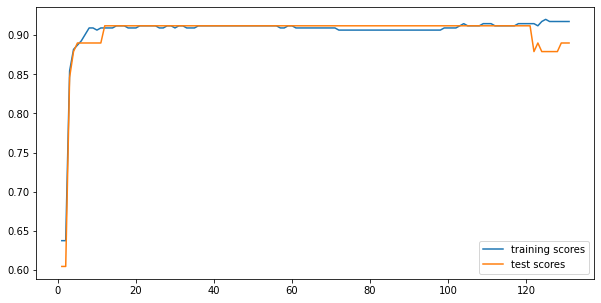

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=47)
training_scores = []
test_scores = []
C = [i/10000 for i in range(1, 10000, 100)]
M = [i for i in range(1,100, 5)]
N = [i for i in range(100,1000000, 100000)]
for i in M:
    C.append(i)
for i in N:
    C.append(i)
C.append(1000000)
numbers = []
kek = 0

for c in C:
    kek += 1
    clf = SVC(c, kernel='rbf')
    clf.fit(X_train, y_train)
    numbers.append(kek)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(C)
print(training_scores)
print(test_scores)

При большем количестве фичей качество модели выросло.

In [28]:
rfclf = RandomForestClassifier()
params = {
    'n_estimators': [100,200,300,500, 750, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,7,10],
    'min_samples_split': [2,4,7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample'],
}

In [29]:
gscv = GridSearchCV(rfclf, params, n_jobs = -1, verbose = 1, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  9.2min finished


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [30]:
print(gscv.score(X_train, y_train))
print(gscv.score(X_test, y_test))

0.9313186813186813
0.8681318681318682


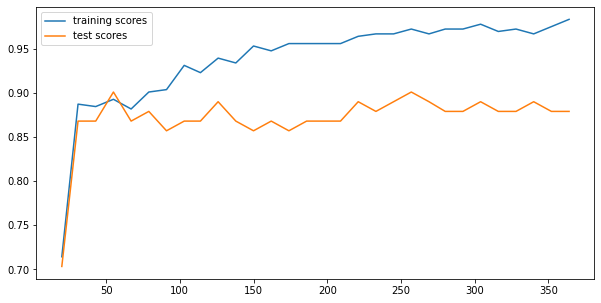

In [31]:
training_scores, test_scores, numbers = [], [], []
clf = RandomForestClassifier(
        class_weight  = 'balanced_subsample',
         criterion  = 'entropy',
         max_depth  = 7,
         max_features  = 'sqrt',
         min_samples_split = 2,
         n_estimators  = 100)
for i in np.linspace(20, len(X_train), 30):
    clf.fit(X_train[:int(i)], y_train[:int(i)])

    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")